### Import libraries

First, we need to import libraries for plotting and manipulating data

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

In [3]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
# confirm that you are currently using the newest version of SDK (2.10.0 for now)
import allensdk
allensdk.__version__

'2.10.0'

In [5]:
# import behavior projet cache class from SDK to be able to load the data
import allensdk.brain_observatory.behavior.behavior_project_cache as bpc

### Load data tables 

This code block allows you to use behavior project cache (bpc) class to get behavior and ophys tables.

In [6]:

my_cache_dir = "/home/iryna.yavorska/tmp"
bc = bpc.VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=my_cache_dir)

# the production bucket is set as default:
# bucket_name="visual_behavior_ophys_data"
# project_name="visual-behavior-ophys"

behavior_session_table = bc.get_behavior_session_table()  
session_table = bc.get_session_table()   
experiment_table = bc.get_experiment_table()                         

#print number of items in each table for all imaging and behavioral sessions
print('Number of behavior sessions = {}'.format(len(behavior_session_table)))
print('Number of ophys sessions = {}'.format(len(session_table)))
print('Number of ophys experiments = {}'.format(len(experiment_table)))


#print number of items in each table with Mesoscope imaging
print('Number of behavior sessions with Mesoscope = {}'.format(len(behavior_session_table[behavior_session_table.project_code.isin(['VisualBehaviorMultiscope'])])))
print('Number of ophys sessions with Mesoscope = {}'.format(len(session_table[session_table.project_code.isin(['VisualBehaviorMultiscope'])])))
print('Number of ophys experiments with Mesoscope = {}'.format(len(experiment_table[experiment_table.project_code.isin(['VisualBehaviorMultiscope'])])))



Number of behavior sessions = 3572
Number of ophys sessions = 551
Number of ophys experiments = 1165
Number of behavior sessions with Mesoscope = 133
Number of ophys sessions with Mesoscope = 133
Number of ophys experiments with Mesoscope = 747


Experiment table contains ophys experiment ids and associated metadata with them (cre line, session type, project code, etc. as well as other ids associated with this experiment such as ophys container and session ids, behavior session id, etc) This table give you an overview of what data is available for analysis.

In [34]:
# let's print a sample of 5 rows to see what's in the table
experiment_table.sample(5)


,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,session_type,cre_line,indicator,...,prior_exposures_to_image_set,prior_exposures_to_omissions,ophys_session_id,behavior_session_id,ophys_container_id,project_code,imaging_depth,targeted_structure,date_of_acquisition,file_id
ophys_experiment_id,,,,,,,,,,,,,,,,,,,,,
962473308,CAM2P.3,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,467954,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,174.0,OPHYS_3_images_B,Vip-IRES-Cre,GCaMP6f,...,6.0,2,961665529,961819631,969421516,VisualBehaviorTask1B,175,VISp,2019-10-07 15:16:44.000000,962685182
978296100,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,482853,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,130.0,OPHYS_4_images_B,Sst-IRES-Cre,GCaMP6f,...,0.0,4,978201478,978216799,1018028206,VisualBehaviorMultiscope,320,VISp,2019-11-07 14:08:52.318328,1085398071
851085100,MESO.1,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,438912,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],M,131.0,OPHYS_6_images_B,Vip-IRES-Cre,GCaMP6f,...,1.0,4,850894918,850976604,1018027847,VisualBehaviorMultiscope,75,VISp,2019-04-12 11:41:08.606439,1085398547
1065523118,CAM2P.4,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,544261,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],F,126.0,OPHYS_1_images_A,Vip-IRES-Cre,GCaMP6f,...,3.0,0,1065382549,1065410067,1064333322,VisualBehavior,175,VISp,2020-11-23 18:00:25.000000,1065746200
977247466,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,482853,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],M,128.0,OPHYS_2_images_A_passive,Sst-IRES-Cre,GCaMP6f,...,6.0,2,976382032,976558967,1018028199,VisualBehaviorMultiscope,145,VISp,2019-11-05 08:42:52.484284,1086012690


You can get any experiment ids from the experiment table by subsetting the table using various conditions. You can search by any columns in the table. Here, we can select experiments from Sst mice only, novel Ophys session 4, with 0 prior exposures to the stimulus (aka not a retake). 

In [39]:
# get all Sst experiments for ophys session 4
selected_experiment_table = experiment_table[(experiment_table.cre_line=='Sst-IRES-Cre')&
                        (experiment_table.session_number==4) &
                        (experiment_table.prior_exposures_to_image_set==0)]
print('Number of experiments: {}'.format(len(selected_experiment_table)))

Number of experiments: 27


Note that experiment = imaging plane. Some of these experiments come from the same imaging session. Here, we can check how many unique imaging sessions are associated with experiments selected above.

In [40]:
print('Number of unique sessions: {}'.format(len(selected_experiment_table['ophys_session_id'].unique())))

Number of unique sessions: 11


### Load an experiment

Let's pick a random experiment from the table and plot some ophys and behavioral data.

In [41]:
# select first experiment from the table to look at in more detail. 
# Note that python enumeration starts at 0.
ophys_experiment_id = selected_experiment_table.index[0]
dataset = bc.get_behavior_ophys_experiment(ophys_experiment_id)

In [42]:
# Show metadata for this experiment
dataset.metadata

{'ophys_session_id': 957020350,
 'equipment_name': 'MESO.1',
 'imaging_plane_group': 0,
 'experiment_container_id': 1018028342,
 'session_type': 'OPHYS_4_images_B',
 'field_of_view_height': 512,
 'field_of_view_width': 512,
 'stimulus_frame_rate': 60.0,
 'behavior_session_id': 957032492,
 'imaging_depth': 150,
 'ophys_experiment_id': 957759562,
 'imaging_plane_group_count': 4,
 'behavior_session_uuid': UUID('40897cd4-3279-4a2d-b65d-b3f984e34e17'),
 'mouse_id': 457841,
 'sex': 'F',
 'age_in_days': 233,
 'full_genotype': 'Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt',
 'reporter_line': 'Ai148(TIT2L-GC6f-ICL-tTA2)',
 'driver_line': ['Sst-IRES-Cre'],
 'cre_line': 'Sst-IRES-Cre',
 'date_of_acquisition': datetime.datetime(2019, 9, 27, 8, 28, 5, tzinfo=tzutc()),
 'ophys_frame_rate': 11.0,
 'indicator': 'GCaMP6f',
 'targeted_structure': 'VISp',
 'excitation_lambda': 910.0,
 'emission_lambda': 520.0}

You can get additional information about this experiment from the metadata field of dataset class. Here, you can see that this experiment was in Sst Cre line, in a female mouse at 233 days old, recorded using mesoscope (this is one of four imaging planes), at imaging depth of 150 microns, in primary visual cortex (VISp). This experiment is also from OPHYS 1 session using image set A.  

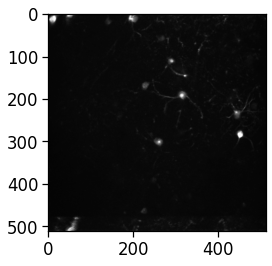

In [43]:
# plot max projection from this experiment
plt.imshow(dataset.max_projection, cmap='gray')

In [13]:
# load cell specimen table with some of cell metrics 
dataset.cell_specimen_table.head(5)

,cell_roi_id,height,mask_image_plane,max_correction_down,max_correction_left,max_correction_right,max_correction_up,valid_roi,width,x,y,roi_mask
cell_specimen_id,,,,,,,,,,,,
1086614149,1080740882,16,0,5.0,25.0,3.0,30.0,True,17,216,456,"[[False, False, False, False, False, False, Fa..."
1086614819,1080740886,22,0,5.0,25.0,3.0,30.0,True,16,443,275,"[[False, False, False, False, False, False, Fa..."
1086614512,1080740888,19,0,5.0,25.0,3.0,30.0,True,22,248,294,"[[False, False, False, False, False, False, Fa..."
1086613265,1080740947,20,0,5.0,25.0,3.0,30.0,True,21,305,183,"[[False, False, False, False, False, False, Fa..."
1086616398,1080740952,20,0,5.0,25.0,3.0,30.0,True,19,220,161,"[[False, False, False, False, False, False, Fa..."


In [44]:
# show dff traces for the first 10 cells this experiment 
dataset.dff_traces.head(10)

,cell_roi_id,dff
cell_specimen_id,,
1086614149,1080740882,"[0.3417784869670868, 0.1917504370212555, 0.169..."
1086614819,1080740886,"[0.0, -2.010002374649048, -1.3567286729812622,..."
1086614512,1080740888,"[0.07121878117322922, 0.10929209738969803, 0.0..."
1086613265,1080740947,"[0.3090711534023285, 0.02156120352447033, -0.0..."
1086616398,1080740952,"[0.0, 0.15438319742679596, 0.37885594367980957..."
1086615620,1080740955,"[0.15867245197296143, 0.15752384066581726, 0.2..."
1086615201,1080740967,"[0.42869994044303894, 0.23723232746124268, -0...."
1086616101,1080741008,"[0.727859377861023, 0.20604123175144196, 0.333..."


In [45]:
# show events traces for the first 10 cells in this experiment 
dataset.events.head(10)

,cell_roi_id,events,filtered_events,lambda,noise_std
cell_specimen_id,,,,,
1086614149,1080740882,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0753,0.085235
1086614819,1080740886,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",5.3130,0.714571
1086614512,1080740888,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0324,0.055955
1086613265,1080740947,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0272,0.051073
1086616398,1080740952,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0570,0.074011
1086615620,1080740955,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0769,0.086979
1086615201,1080740967,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0872,0.091952
1086616101,1080741008,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.1596,0.123868


In [47]:
# if you don't want dff in a pandas table, you can load dataset dff traces as an array
dff_array = np.vstack(dataset.dff_traces.dff.values)
print('This array contrains dff traces from {} neurons and it is {} samples long.'.format(dff_array.shape[0], dff_array.shape[1]))

This array contrains dff traces from 8 neurons and it is 48284 samples long.


In [17]:
# load ophys timestamps. The timestamps are the same for dff traces and events, in seconds
dataset.ophys_timestamps

array([   8.72468,    8.81788,    8.91108, ..., 4509.98089, 4510.07412,
       4510.16735])

### Pick a cell and plot the traces

We can select a random cell from the experiment and plot its dff and events traces along with other behavioral and stimulus data.

In [18]:
cell_specimen_ids = dataset.cell_specimen_table.index.values # a list of all cell ids
cell_specimen_id = cell_specimen_ids[5] # let's pick 6th cell
print('Cell specimen id = {}'.format(cell_specimen_id)) # print id

Cell specimen id = 1086615620


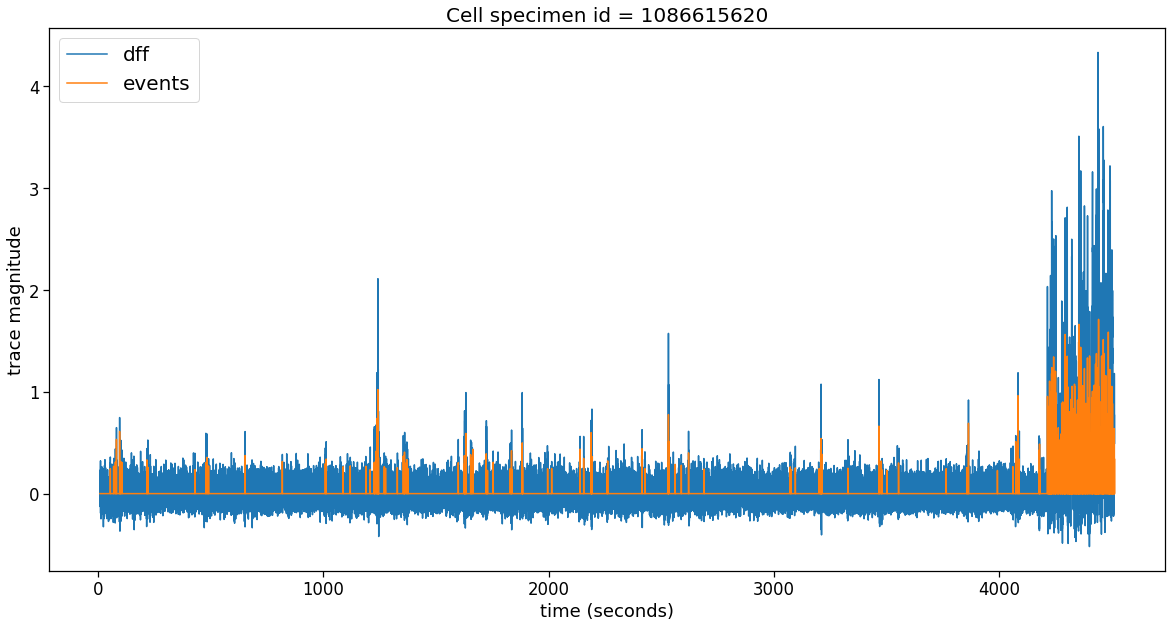

In [19]:
# plot dff and events traces overlaid from the cell selected above
fig, ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(dataset.ophys_timestamps, dataset.dff_traces.loc[cell_specimen_id, 'dff'])
ax.plot(dataset.ophys_timestamps, dataset.events.loc[cell_specimen_id, 'events'])
ax.set_xlabel('time (seconds)')
ax.set_ylabel('trace magnitude')
ax.set_title('Cell specimen id = {}'.format(cell_specimen_id), fontsize = 20)
ax.legend(['dff', 'events'], fontsize = 20)


*Little information about events and how they were computed here*

Text(0.5, 1.0, 'Ophys experiment 957759562')

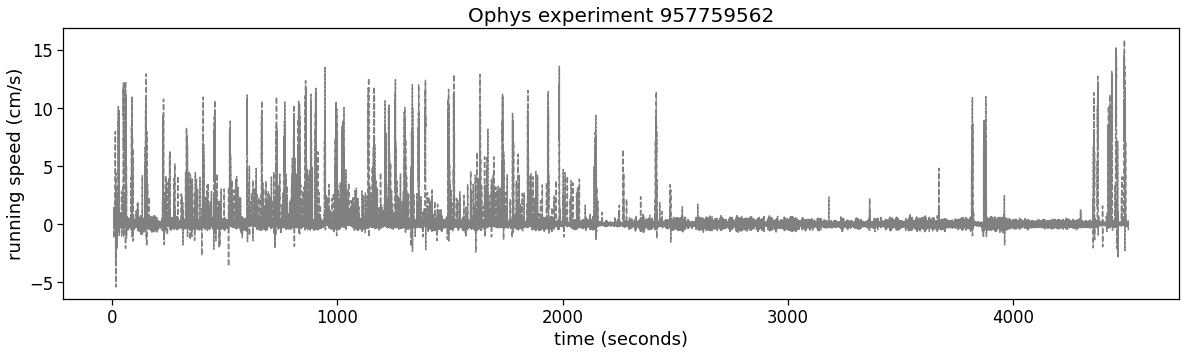

In [20]:
# plot mouse running speed from this experiment
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.stimulus_timestamps, dataset.running_speed['speed'], color='gray', linestyle='--')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('running speed (cm/s)')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_tracking_data["eye_area"][likely_blinks] = np.nan
c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_tracking_data["pupil_area"][likely_blinks] = np.nan
c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:275: SettingWithC

Text(0.5, 1.0, 'Ophys experiment 957759562')

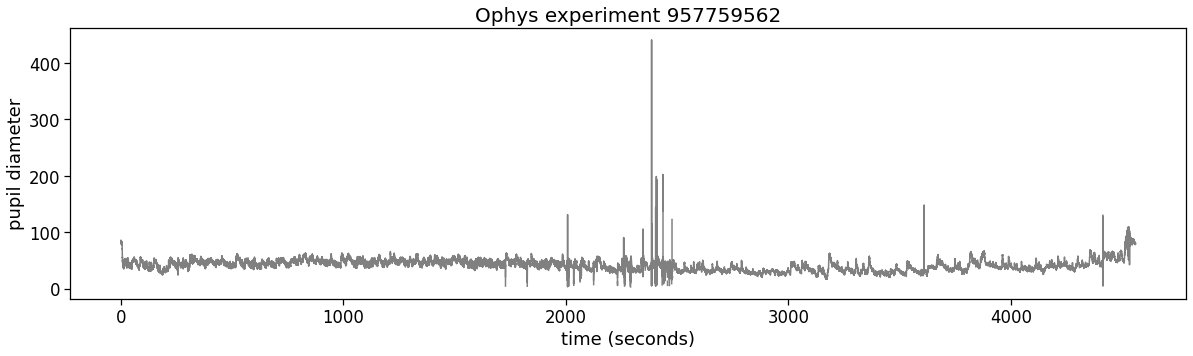

In [21]:
# plot pupil diameter for the same experiment
fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.eye_tracking.timestamps, dataset.eye_tracking.pupil_width, color='gray')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('pupil diameter')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

Large spikes in the trace can be due to blinking. They can be smoothed or filtered.

Text(0.5, 1.0, 'Ophys experiment 957759562')

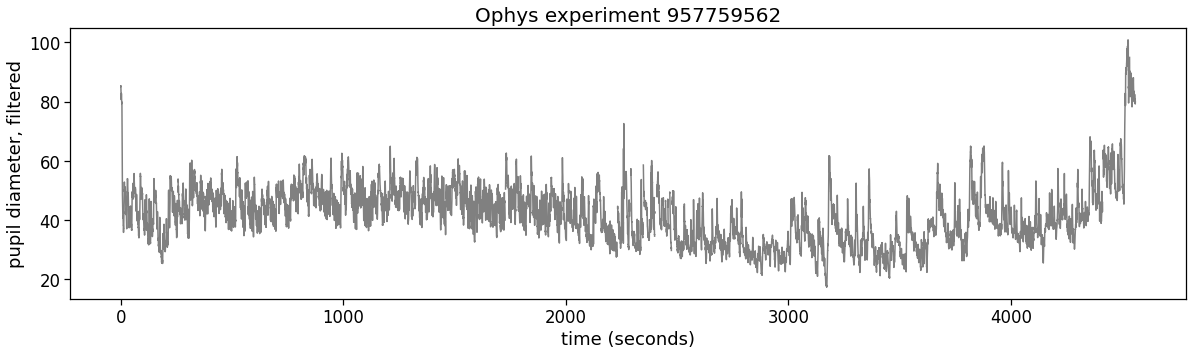

In [22]:
# you can smooth or filter signals with your choice of methods in scipy library. 
import scipy.signal as signal

smoothed_pupil_diameter = signal.savgol_filter(dataset.eye_tracking.pupil_width, 51, 5, mode='nearest')

fig, ax = plt.subplots(1,1, figsize = (20,5))
ax.plot(dataset.eye_tracking.timestamps, smoothed_pupil_diameter, color='gray')
ax.set_xlabel('time (seconds)')
ax.set_ylabel('pupil diameter, filtered')
ax.set_title('Ophys experiment {}'.format(ophys_experiment_id), fontsize = 20)

### Get information about stimuli presented on each trial

In [23]:
# get stimulus information for this experiment and assign it to a table called "stimulus_table"
stimulus_table = dataset.stimulus_presentations
stimulus_table.sample(10)

,duration,end_frame,image_index,image_name,image_set,index,omitted,start_frame,start_time,stop_time
stimulus_presentations_id,,,,,,,,,,
1108,0.25023,67868.0,5,im054,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,1072,False,67853,1140.54935,1140.79958
4467,0.25020,219047.0,2,im075,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4317,False,219032,3662.25973,3662.50993
280,0.25020,30601.0,1,im106,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,271,False,30586,518.92485,519.17505
3665,0.25020,182950.0,7,im035,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3539,False,182935,3060.15114,3060.40134
3909,0.25021,193932.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,3774,False,193917,3243.33414,3243.58435
799,0.25021,53961.0,5,im054,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,777,False,53946,908.57651,908.82672
728,0.25018,50765.0,6,im031,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,707,False,50750,855.26631,855.51649
976,0.25020,61926.0,1,im106,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,949,False,61911,1041.43507,1041.68527
4419,0.25020,216887.0,4,im045,Natural_Images_Lum_Matched_set_ophys_6_2017.07.14,4269,False,216872,3626.23031,3626.48051


This table provides informationa bout image name, start, duration and stop of image presentation, and whether the image was omitted. 

In [24]:
print('This experiment had {} stimuli.'.format(len(stimulus_table)))
print('Out of all stimuli presented, {} were omitted.'.format(len(stimulus_table[stimulus_table['image_name']=='omitted'])))


This experiment had 4797 stimuli.
Out of all stimuli presented, 160 were omitted.


In [25]:
# You can also use "keys()" method to see the names of the columns in the stimulus table
stimulus_table.keys()

Index(['duration', 'end_frame', 'image_index', 'image_name', 'image_set',
       'index', 'omitted', 'start_frame', 'start_time', 'stop_time'],
      dtype='object')

### Get task and behavioral information for each trial

In [26]:
# get behavioral trial information and assign it to "trials_table"
trials_table = dataset.trials
trials_table.head(5)


,start_time,stop_time,lick_times,reward_time,reward_volume,hit,false_alarm,miss,stimulus_change,aborted,...,catch,auto_rewarded,correct_reject,trial_length,response_time,change_frame,change_time,response_latency,initial_image_name,change_image_name
trials_id,,,,,,,,,,,,,,,,,,,,,
0,308.73646,309.85402,"[309.12011, 309.30359, 309.53711]",NaN,0.000,False,False,False,False,True,...,False,False,False,1.11756,NaN,NaN,NaN,NaN,im000,im000
1,310.23770,318.26089,"[314.37439, 314.50783, 314.64127, 314.79139, 3...",314.14086,0.005,False,False,False,True,False,...,False,True,False,8.02319,314.37439,18300.0,314.026728,0.347662,im000,im031
2,318.49442,319.37846,"[318.6779, 318.86138, 319.06156, 319.39515, 31...",NaN,0.000,False,False,False,False,True,...,False,False,False,0.88404,NaN,NaN,NaN,NaN,im031,im031
3,319.99565,323.19826,"[322.58109, 322.71452, 322.88134, 323.46514, 3...",NaN,0.000,False,False,False,False,True,...,False,False,False,3.20261,NaN,NaN,NaN,NaN,im031,im031
4,323.73205,331.02131,"[327.1515, 327.26826, 327.38503, 327.51846, 32...",326.91797,0.005,False,False,False,True,False,...,False,True,False,7.28926,327.15150,19065.0,326.787158,0.364342,im031,im000


In [27]:
trials_table.keys()

Index(['start_time', 'stop_time', 'lick_times', 'reward_time', 'reward_volume',
       'hit', 'false_alarm', 'miss', 'stimulus_change', 'aborted', 'go',
       'catch', 'auto_rewarded', 'correct_reject', 'trial_length',
       'response_time', 'change_frame', 'change_time', 'response_latency',
       'initial_image_name', 'change_image_name'],
      dtype='object')

This table has information about the trials. "Go" trials are change trials when the animal was supposed to lick. If the animal licked, "hit" is set to True for that trial. If the animal was rewarded, reward time will have time in seconds. If this was an auto_rewarded trial (regardless of whether the animal got it right), "auto_rewarded" is set to True. 

### Plot single trial response for a selected cell

Now, we will put together a plotting functions that utilizes data in the dataset class to plot ophys traces and behavioral data from an experiment


In [28]:
# create a list of all unique stimuli presented in this experiment
unique_stimuli = [stimulus for stimulus in dataset.stimulus_presentations['image_name'].unique()]

# create a colormap with each unique image having its own color
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}

# add the colors for each image to the stimulus presentations table in the dataset
dataset.stimulus_presentations['color'] = dataset.stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

In [29]:
# function to plot dff traces
def plot_dff_trace(ax, cell_specimen_id, ti, tf):
    # create a dataframe using dff trace from one seleted cell
    data = {'dff': dataset.dff_traces.loc[cell_specimen_id].dff,
        'timestamps': dataset.ophys_timestamps}
    df = pd.DataFrame(data)
    dff_trace_sample = df.query('timestamps >= @ti and timestamps <= @tf')
    ax.plot(
        dff_trace_sample['timestamps'],
        dff_trace_sample['dff']/dff_trace_sample['dff'].max()
    )
    
# function to plot events traces    
def plot_events_trace(ax, cell_specimen_id, ti, tf):
    # create a dataframe using events trace from one seleted cell
    data = {'events': dataset.events.loc[cell_specimen_id].events,
        'timestamps': dataset.ophys_timestamps}
    df = pd.DataFrame(data)
    events_trace_sample = df.query('timestamps >= @ti and timestamps <= @tf')
    ax.plot(
        events_trace_sample['timestamps'],
        events_trace_sample['events']/events_trace_sample['events'].max()
    )
# function to plot running speed   
def plot_running(ax, ti, tf):
    running_sample = dataset.running_speed.query('timestamps >= @ti and timestamps <= @tf')
    ax.plot(
        running_sample['timestamps'],
        running_sample['speed']/running_sample['speed'].max(),
        '--',
        color = 'gray',
        linewidth = 1
    )
# function to plot pupil diameter   
def plot_pupil(ax, ti, tf):
    pupil_sample = dataset.eye_tracking.query('timestamps >= @ti and timestamps <= @tf')
    ax.plot(
        pupil_sample['timestamps'],
        pupil_sample['pupil_width']/pupil_sample['pupil_width'].max(),
        color = 'gray',
        linewidth = 1
    )
# function to plot licks
def plot_licks(ax, ti, tf):
    licking_sample = dataset.licks.query('timestamps >= @ti and timestamps <= @tf')
    ax.plot(
        licking_sample['timestamps'],
        np.zeros_like(licking_sample['timestamps']),
        marker = 'o',
        markersize = 3,
        color = 'black',
        linestyle = 'none'
    )
# function to plot rewards    
def plot_rewards(ax, ti, tf):
    rewards_sample = dataset.rewards.query('timestamps >= @ti and timestamps <= @tf')
    ax.plot(
        rewards_sample['timestamps'],
        np.zeros_like(rewards_sample['timestamps']),
        marker = 'd',
        color = 'blue',
        linestyle = 'none',
        markersize = 12,
        alpha = 0.5
    )
    
def plot_stimuli(ax, ti, tf):
    stimulus_presentations_sample = dataset.stimulus_presentations.query('stop_time >= @ti and start_time <= @tf')
    for idx, stimulus in stimulus_presentations_sample.iterrows():
        ax.axvspan(stimulus['start_time'], stimulus['stop_time'], color=stimulus['color'], alpha=0.25)

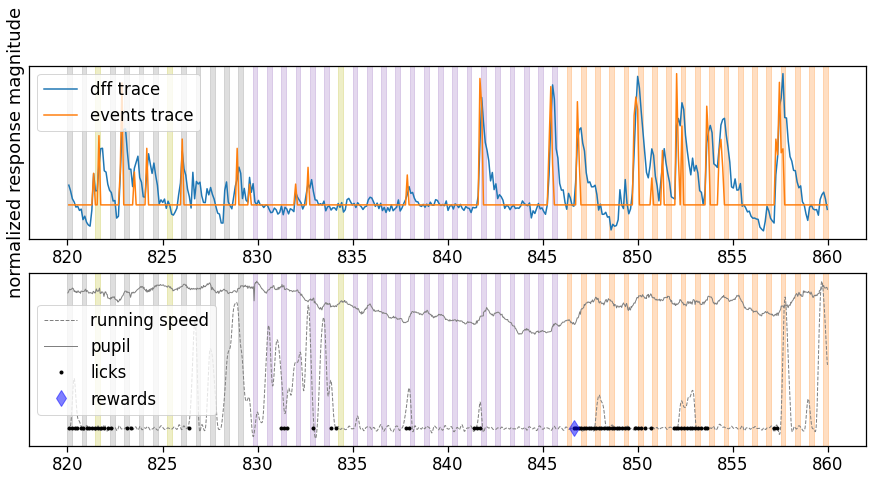

In [30]:
ti = 820 # start time in seconds
tf = 860 # stop time in seconds
fig, ax = plt.subplots(2,1,figsize = (15,7))
plot_dff_trace(ax[0], cell_specimen_ids[3], ti, tf)
plot_events_trace(ax[0], cell_specimen_ids[3], ti, tf)
plot_stimuli(ax[0], ti, tf)
ax[0].set_ylabel('normalized response magnitude')
ax[0].set_yticks([])
ax[0].legend(['dff trace', 'events trace'])

plot_running(ax[1], ti, tf)
plot_pupil(ax[1], ti, tf)
plot_licks(ax[1], ti, tf)
plot_rewards(ax[1], ti, tf)
plot_stimuli(ax[1], ti, tf)

ax[1].set_yticks([])
ax[1].legend(['running speed', 'pupil','licks', 'rewards'])

### Vip cell example

We can get a different, Vip experiment from Ophys session 1 and plot it to compare response traces


In [31]:
selected_experiment_table = experiment_table[(experiment_table.cre_line=='Vip-IRES-Cre')&
                        (experiment_table.session_number==1)]
dataset = bc.get_behavior_ophys_experiment(selected_experiment_table.index.values[0])
cell_specimen_ids = dataset.cell_specimen_table.index.values # a list of all cell ids


In [32]:

# create a list of all unique stimuli presented in this experiment
unique_stimuli = [stimulus for stimulus in dataset.stimulus_presentations['image_name'].unique()]

# create a colormap with each unique image having its own color
colormap = {image_name: sns.color_palette()[image_number] for image_number, image_name in enumerate(np.sort(unique_stimuli))}

# add the colors for each image to the stimulus presentations table in the dataset
dataset.stimulus_presentations['color'] = dataset.stimulus_presentations['image_name'].map(lambda image_name: colormap[image_name])

c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:273: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_tracking_data["eye_area"][likely_blinks] = np.nan
c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:274: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eye_tracking_data["pupil_area"][likely_blinks] = np.nan
c:\users\iryna.yavorska\documents\github\allensdk\allensdk\brain_observatory\behavior\session_apis\data_io\behavior_ophys_nwb_api.py:275: SettingWithC

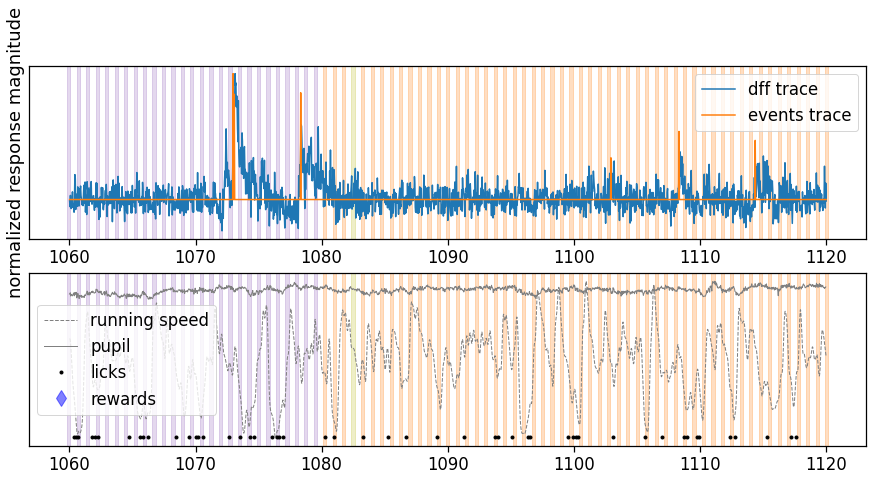

In [33]:
# we can plot the same information for a different cell in the dataset
ti = 1060 # start time in seconds
tf = 1120 # stop time in seconds
fig, ax = plt.subplots(2,1,figsize = (15,7))
plot_dff_trace(ax[0], cell_specimen_ids[3], ti, tf)
plot_events_trace(ax[0], cell_specimen_ids[3], ti, tf)
plot_stimuli(ax[0], ti, tf)
ax[0].set_ylabel('normalized response magnitude')
ax[0].set_yticks([])
ax[0].legend(['dff trace', 'events trace'])

plot_running(ax[1], ti, tf)
plot_pupil(ax[1], ti, tf)
plot_licks(ax[1], ti, tf)
plot_rewards(ax[1], ti, tf)
plot_stimuli(ax[1], ti, tf)

ax[1].set_yticks([])
ax[1].legend(['running speed', 'pupil','licks', 'rewards'])